# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Victoria Thai
- Hannah Yick
- Jane Dinh
- Natasha Supangkat
- Gabriel Ramiro

<a id='research_question'></a>
# Research Question

What trends can be found between a county’s designation of a superfund site and its socioeconomic/demographic trends? Does the demographic makeup of a county influence the amount of time between Superfund designation and the completion of the remediation process?

<a id='background'></a>

## Background & Prior Work

In response to nationwide outrage towards the improper management and disposal of toxic waste in local communities in the 1970s, Congress enacted CERCLA, or the Comprehensive Environmental Response, Compensation, and Liability Act. CERCLA, more commonly known as Superfund, gives the EPA authority to respond to hazardous waste threats in what are designated as Superfund sites. Love Canal was the first Superfund site on CERCLA's National Priorities List. It was a neighborhood in Niagara Falls, New York that was vulnerable to decades of dumping municipal solid waste, industrial waste, and hazardous waste which ultimately harmed hundreds of residents that lived near the site. To counteract this issue, CERCLA created a tax on chemical and petroleum industries and implemented a Federal authority that investigates and responds to the release of hazardous material onto the environment that may endanger public health. To this day, the problems that spurred the creation of Superfund continue to plague the country—under CERCLA's guidelines regarding the release of toxic substances into the environment from a facility, the recent situation in Flint, Michigan falls under their jurisdiction. Hundreds of residents of Flint, Michigan were susceptible to lead poisoning from lead seepage into their drinking water. The response to this situation is a long-term cleanup by the EPA under the RCRA Corrective Action Program. 

The nature of Superfund and its application is virtually inextricable from environmental justice and environmental racism—marginalized communities have historically bore the brunt of pollution and other consequences of environmental degradation. In June 2020, the Shriver Center on Poverty Law found that 70% of Superfund sites are located within 1 mile of public housing. The Superfund Trust Fund receives money mainly from petroleum excise taxes, chemical feedstock excise taxes, and environmental income taxes. However, the EPA taxes the potentially responsible parties (PRPs) and compels them to clean up the contaminated site. Nonetheless, a bill in the 90s made a huge impact on funding and cleanup by mainly taxing American citizens. This could be seen as an attempt to sully the public opinion of Superfund and affect how corporations are held accountable.


References (include links):
- 1) https://www.epa.gov/superfund/superfund-cercla-overview
- 2) https://www.povertylaw.org/wp-content/uploads/2020/06/environmental_justice_report_final-rev2.pdf
- 3) https://www.washingtonpost.com/national/taxpayer-dollars-fund-most-oversight-and-cleanup-costs-at-superfund-sites/2017/09/20/aedcd426-8209-11e7-902a-2a9f2d808496_story.html

# Hypothesis


We hypothesize that there will be more Superfund sites in lower-income areas and areas with large populations of marginalized communities, likely because these groups have less political and financial power to retaliate or hold the perpetrators accountable. The inequity and prejudice that disproportionately affects these groups is directly linked to environmental justice. We also predict that Superfund sites in areas associated with lower socioeconomic status will see longer periods of time between designation date and the completion of the remediation process for similar reasons.

# Dataset(s)

We will combine our datasets using the common variable of geographic location (county). By analyzing both aspects - Superfund activity and demographic breakdown - holistically, we will be able to better visualize and understand trends and potentially a relationship between the two.

1) **Superfund/National Priorities List (NPL) Sites**
- Number of observations: 1327 (as of April 26, 2021)
- Features: Region, state, site name, site ID, EPA ID, address, city, zip, county, federal facility indicator (whether or not the site is a federal site), latitude, longitude, listing date.
 - We will be focusing on the site name, county, and listing date.
- Summary: This dataset provides a comprehensive overview of the main characteristics of current Superfund sites on the National Priorities List. Geographical information (county) can help us better understand the spread of the data by location, and will allow us to combine with demographic data to explore trends. Additionally, we will use the listing date to determine the source of funding (based on the date of policy changes) as well as to measure how long the site has been active.
- Source: https://semspub.epa.gov/work/HQ/201371.pdf 

2) **2019 American Community Survey 5 Year Estimate by County**
- Number of observations: 3220 
- Features: Total population, race, per capita income median household income, poverty status by race. 
- Summary: This dataset provides demographic and socioeconomic data on each city’s population. This will help us understand population trends based on the NPL sites. 
- Source: https://www.socialexplorer.com/explore-maps
    - We started with looking at demographic data over a very large period of time, which we sourced from 
    the decennial U.S. census. After further exploring our NPL dataset, however, we realized that the NPL 
    set was constantly being updated and thus included only sites that are currently active (as of April 
    2021), so trends over a 50-year period would not be as salient. We then constrained the scope of our 
    question, and thus our data, to focus on current demographic trends. Because the decennial census has 
    shifted away from some of the socioeconomic variables that we needed, we sourced our demographic data 
    from the 2019 American Community Survey (also conducted by the U.S. Census Bureau). We’d like to 
    highlight that this data captures mean values over a 5 year period, from 2015 to 2019.



# Setup

In [27]:
#Imports 
import pandas as pd
import numpy as np

#Graphing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Statistics
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#Webscraping
import requests 
import bs4
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

# Read in the data and store it within a data frame
#npl_df = npl_df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group011_sp21/main/All%20current%20Final%20NPL%20Sites%20(FOIA%204).csv?token=AI2VKGQIIMQPBWGAZGPKD5DASR4CO') 
gdrive_npl_id = '1oDIJ_v9s5i5THULln_C-N4o3Aiz0e7mu'
npl_df = pd.read_csv(f'https://docs.google.com/uc?id={gdrive_npl_id}&export=download', encoding='ISO-8859-1')
gdrive_acs_id = '1kNWY1Kc4RhQ9ttK7dTYtj0fhHE3BXOGh'
acs_df = pd.read_csv(f'https://docs.google.com/uc?id={gdrive_acs_id}&export=download', encoding='ISO-8859-1')

pd.options.display.max_rows = 5
pd.options.display.max_columns = 8

# Data Cleaning/Wrangling

In [28]:
npl_df = npl_df.drop(["Region", "Site ID", "EPA ID", "Address", "Zip", "FF Ind", "Latitude", "Longitude"], axis=1)

In [29]:
acs_df = acs_df.drop([0], axis=0)
acs_df.reset_index(drop=True, inplace=True)

acs_df.dropna(axis = 0, how = 'all', inplace = True)
acs_df.dropna(axis = 1, how = 'all', inplace = True)

acs_df.drop(labels=['FIPS', 'Geographic Identifier', 'Summary Level', 'Geographic Component', 
                    'File identification', 'Logical Record Number', 'State (FIPS Code)', 
                    'County of current residence', 'Total Population.1', 
                    'Area (Land)', 'Total Population:', 'Total Population: White Alone', 
                    'Total Population: Black or African American Alone', 
                    'Total Population: American Indian and Alaska Native Alone', 'Total Population: Asian Alone', 
                    'Total Population: Native Hawaiian and Other Pacific Islander Alone', 
                    'Total Population: Some Other Race Alone', 'Total Population: Two or More Races'], axis=1, inplace = True)
acs_df.drop(index=acs_df[acs_df['State Postal Abbreviation'] == 'pr'].index, inplace=True)
acs_df.drop(list(acs_df.filter(regex = 'At or Above Poverty Level')), axis = 1, inplace = True)

acs_df = acs_df.iloc[:, np.r_[0:12, 12:23, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67]]

We'll need to adjust our dataset now that we have a better understanding of our data and how we want to work with it. Here, we'll work towards merging our two datasets by county. Let's start by standardizing the county variable of both datasets with a format of 'COUNTY, PC' where PC is the postal code (i.e. CA for California). This will handle instances where there are counties of the same name in different states.

First, let's take a look at our NPL dataset.

In [30]:
npl_df.sample(n=10)

,State,Site Name,City,County,NPL Status Date
1126,MT,MOUAT INDUSTRIES,COLUMBUS,STILLWATER,6/10/1986
575,KY,PADUCAH GASEOUS DIFFUSION PLANT (USDOE),PADUCAH,MCCRACKEN,5/31/1994
...,...,...,...,...,...
394,PA,KIMBERTON,EAST PIKELAND TOWNSHIP,CHESTER,9/8/1983
494,AL,T.H. AGRICULTURE & NUTRITION CO. (MONTGOMERY P...,MONTGOMERY,MONTGOMERY,8/30/1990


Let's examine the dataset and check for missingness.

In [31]:
npl_df.isna().sum().sum()

20

In [32]:
npl_df.isna().any()

State              False
Site Name          False
City               False
County              True
NPL Status Date    False
dtype: bool

From this, we can see that all the missing data is in the County variable.

In [33]:
#subset to just rows with missing data
npl_df[npl_df.isnull().any(axis=1)]

,State,Site Name,City,County,NPL Status Date
266,NY,NEWTOWN CREEK,"BROOKLYN, QUEENS",NaN,9/29/2010
303,PR,FIBERS PUBLIC SUPPLY WELLS,JOBOS,NaN,9/21/1984
...,...,...,...,...,...
1263,ID,EASTERN MICHAUD FLATS CONTAMINATION,POCATELLO,NaN,8/30/1990
1264,ID,IDAHO NATIONAL ENGINEERING LABORATORY (USDOE),IDAHO FALLS,NaN,11/21/1989


We can see from the subset of missing data that these NPL sites are in valid cities in the United States, so there's no reason to drop them; however, they do not have data for the county. We will have to manually input these county values so that we can merge successfully before we go any further.

In [34]:
# manually input county names here
npl_df['County'][266] = 'KINGS-QUEENS'
npl_df['County'][303] = 'GUYAMA'
npl_df['County'][306] = 'UTUADO'
npl_df['County'][311] = 'TOA BAJA'
npl_df['County'][314] = 'VEGA ALTA'
npl_df['County'][495] = 'MORGAN-MADISON-LIMESTONE'
npl_df['County'][644] = 'AIKEN-ALLENDALE-BARNWELL'
npl_df['County'][661] = 'ANDERSON'
npl_df['County'][853] = 'HAMILTON'
npl_df['County'][881] = 'GREENE '
npl_df['County'][1127] = 'BUTTE-SILVER BOW'
npl_df['County'][1129] = 'MEADE'
npl_df['County'][1134] = 'DAVIS'
npl_df['County'][1256] = 'ALEUTIANS WEST CENSUS AREA'
npl_df['County'][1258] = 'ANCHORAGE'
npl_df['County'][1259] = 'ANCHORAGE'
npl_df['County'][1260] = 'FAIRBANKS NORTH STAR'
npl_df['County'][1261] = 'PRINCE OF WALES-HYDER CENSUS AREA'
npl_df['County'][1263] = 'BANNOCK'
npl_df['County'][1264] = 'BUTTE'

In [35]:
# clarify that all missing data has been addressed
npl_df.isna().sum().sum()

0

Now that all the county information is included, we'll convert the column names into lowercase, and continue this use of lowercase column names as we progress with both datasets as a standardization measure.

In [36]:
npl_df.columns = ['state', 'site name', 'city', 'county', 'npl status date']
npl_df.head()

,state,site name,city,county,npl status date
0,CT,BARKHAMSTED-NEW HARTFORD LANDFILL,BARKHAMSTED,LITCHFIELD,10/4/1989
1,CT,BEACON HEIGHTS LANDFILL,BEACON FALLS,NEW HAVEN,9/8/1983
2,CT,DURHAM MEADOWS,DURHAM,MIDDLESEX,10/4/1989
3,CT,GALLUP'S QUARRY,PLAINFIELD,WINDHAM,10/4/1989
4,CT,KELLOGG-DEERING WELL FIELD,NORWALK,FAIRFIELD,9/21/1984


Next we'll get our county variable information into the correct format by concatenating the state postal code.

In [37]:
npl_df['county'] = npl_df['county'].map(str) + ', ' + npl_df['state'].map(str)
npl_df.head()

,state,site name,city,county,npl status date
0,CT,BARKHAMSTED-NEW HARTFORD LANDFILL,BARKHAMSTED,"LITCHFIELD, CT",10/4/1989
1,CT,BEACON HEIGHTS LANDFILL,BEACON FALLS,"NEW HAVEN, CT",9/8/1983
2,CT,DURHAM MEADOWS,DURHAM,"MIDDLESEX, CT",10/4/1989
3,CT,GALLUP'S QUARRY,PLAINFIELD,"WINDHAM, CT",10/4/1989
4,CT,KELLOGG-DEERING WELL FIELD,NORWALK,"FAIRFIELD, CT",9/21/1984


In addition, we added a Duration column that will come into play as we plot our data. The values in this variable are the number of years since NPL status for the site was established (up to 2021).

In [38]:
npl_df['duration'] = npl_df['npl status date'].str[-4:]
npl_df = npl_df.astype({"duration": int})
npl_df['duration'] = 2021 - npl_df['duration']
npl_df

,state,site name,city,county,npl status date,duration
0,CT,BARKHAMSTED-NEW HARTFORD LANDFILL,BARKHAMSTED,"LITCHFIELD, CT",10/4/1989,32
1,CT,BEACON HEIGHTS LANDFILL,BEACON FALLS,"NEW HAVEN, CT",9/8/1983,38
...,...,...,...,...,...,...
1325,WA,"WESTERN PROCESSING CO., INC.",KENT,"KING, WA",9/8/1983,38
1326,WA,WYCKOFF CO./EAGLE HARBOR,BAINBRIDGE ISLAND,"KITSAP, WA",7/22/1987,34


Now we can take a look at our ACS dataset.

In [39]:
acs_df.head()

,Area Name,Qualifying Name,State Postal Abbreviation,Total Population,...,Some Other Race Alone Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,"White Alone, Not Hispanic or Latino Population for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level"
0,Autauga County,"Autauga County, Alabama",al,55380,...,99,199,68,4558
1,Baldwin County,"Baldwin County, Alabama",al,212830,...,623,379,1756,14680
2,Barbour County,"Barbour County, Alabama",al,25361,...,447,148,607,1551
3,Bibb County,"Bibb County, Alabama",al,22493,...,0,0,0,2613
4,Blount County,"Blount County, Alabama",al,57681,...,13,175,1359,6126


First, we want to group our counties by population density since the aggregate data will be easier for our data visualization and analysis later on. Let's create a function to determine the aggregate population density group of each county, then store these in a new variable.

Let's find out the county with the greatest population density per square mile. We'll use this maximum to determine our groupings.

In [40]:
acs_df['Population Density (Per Sq. Mile)'].max()

'99.57047'

In [41]:
def group_by_pop_density(pop_density):
    if pop_density <= 10.0:
        return '≤ 10'
    elif pop_density <= 100.0:
        return '≤ 100'
    elif pop_density <= 500.0:
        return '≤ 500'
    elif pop_density <= 1000.0:
        return '≤ 1,000'
    elif pop_density <= 5000.0:
        return '≤ 5,000'
    elif pop_density <= 10000.0:
        return '≤ 10,000'

In [42]:
acs_df['Population Density (Per Sq. Mile)'] = acs_df['Population Density (Per Sq. Mile)'].astype(float)
acs_df['aggregate population density'] = acs_df['Population Density (Per Sq. Mile)'].apply(group_by_pop_density)
# check out dataset and new variable
acs_df.sample(n=5)

,Area Name,Qualifying Name,State Postal Abbreviation,Total Population,...,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,"White Alone, Not Hispanic or Latino Population for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level",aggregate population density
1418,Forrest County,"Forrest County, Mississippi",ms,75224,...,509,806,7563,≤ 500
1927,Graham County,"Graham County, North Carolina",nc,8509,...,50,101,1187,≤ 100
486,Miller County,"Miller County, Georgia",ga,5787,...,0,0,658,≤ 100
2127,Wayne County,"Wayne County, Ohio",oh,116099,...,236,619,11141,≤ 500
1372,Pipestone County,"Pipestone County, Minnesota",mn,9191,...,99,125,776,≤ 100


We'll need to standardize the formatting for the column describing the county of each observation to match that of our NPL dataset, which is of the format 'COUNTY, PC' with PC being the postal code abbreviation. We can achieve this using the .upper(), .replace(), and .strip() methods.

In [43]:
acs_df.rename({'Area Name': 'county'}, axis=1, inplace=True)
acs_df['State Postal Abbreviation'] = acs_df['State Postal Abbreviation'].str.upper()
acs_df['county'] = acs_df['county'].str.upper()
acs_df['county'] = acs_df['county'].str.replace('COUNTY', '')
acs_df['county'] = acs_df['county'].str.strip()
acs_df['county'] = acs_df['county'].map(str) + ', ' + acs_df['State Postal Abbreviation'].map(str)
acs_df.head()

,county,Qualifying Name,State Postal Abbreviation,Total Population,...,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,"White Alone, Not Hispanic or Latino Population for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level",aggregate population density
0,"AUTAUGA, AL","Autauga County, Alabama",AL,55380,...,199,68,4558,≤ 100
1,"BALDWIN, AL","Baldwin County, Alabama",AL,212830,...,379,1756,14680,≤ 500
2,"BARBOUR, AL","Barbour County, Alabama",AL,25361,...,148,607,1551,≤ 100
3,"BIBB, AL","Bibb County, Alabama",AL,22493,...,0,0,2613,≤ 100
4,"BLOUNT, AL","Blount County, Alabama",AL,57681,...,175,1359,6126,≤ 100


Now that we have a common column, we can merge our datasets. We'll use a left merge with our NPL dataset as our left-dataset, since we only need the demographic data for the county of the NPL sites.

In [44]:
county_df = pd.merge(npl_df, acs_df, on='county', how='left')
county_df = county_df.sort_values(by=['county'])
county_df.sample(n=5)

,state,site name,city,county,...,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,"White Alone, Not Hispanic or Latino Population for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level",aggregate population density
79,RI,DAVISVILLE NAVAL CONSTRUCTION BATTALION CENTER,NORTH KINGSTOWN,"WASHINGTON, RI",...,694,676,8278,≤ 500
218,NY,BREWSTER WELL FIELD,PUTNAM COUNTY,"PUTNAM, NY",...,103,1471,2850,≤ 500
547,FL,WINGATE ROAD MUNICIPAL INCINERATOR DUMP,FORT LAUDERDALE,"BROWARD, FL",...,8107,74109,63213,"≤ 5,000"
485,AL,ALABAMA ARMY AMMUNITION PLANT,CHILDERSBURG,"TALLADEGA, AL",...,322,820,6635,≤ 500
30,MA,"NUCLEAR METALS, INC.",CONCORD,"MIDDLESEX, MA",...,4379,22367,59285,"≤ 5,000"


We'd like to narrow down our scope to only NPL sites in the state of California, so we'll drop all the NPL sites in other states.

In [75]:
# create subset of NPL sites located in California
cali_county_df = county_df[county_df['state'] == 'CA']
cali_county_df

,state,site name,city,county,...,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,"White Alone, Not Hispanic or Latino Population for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level",aggregate population density
1158,CA,AMCO CHEMICAL,OAKLAND,"ALAMEDA, CA",...,9409,45675,34389,"≤ 5,000"
1200,CA,"LAWRENCE LIVERMORE NATL LAB, MAIN SITE (USDOE)",LIVERMORE,"ALAMEDA, CA",...,9409,45675,34389,"≤ 5,000"
...,...,...,...,...,...,...,...,...,...
1219,CA,PACIFIC COAST PIPELINE,FILLMORE,"VENTURA, CA",...,2481,44699,23568,≤ 500
1182,CA,FRONTIER FERTILIZER,DAVIS,"YOLO, CA",...,2676,13047,13423,≤ 500


# Data Analysis & Results

### Median Household Income

Let's narrow down the scope of our dataset for this portion - we'll create a subset using just the relevant variables, including county, site name, and median household income. We'll also drop any rows in the subset with missing data for median household income, as this is essential to our current exploration.

In [46]:
mhi_df = county_df[['site name', 'county', 'Median Household Income (In 2019 Inflation Adjusted Dollars):']]
mhi_df.rename({'Median Household Income (In 2019 Inflation Adjusted Dollars):': 'median household income'}, axis=1, inplace=True)
mhi_df = mhi_df.dropna(subset=['median household income'])
mhi_df['median household income'] = mhi_df['median household income'].astype(int)
mhi_df

,site name,county,median household income
1094,BRODERICK WOOD PRODUCTS,"ADAMS, CO",71202
1107,ROCKY MOUNTAIN ARSENAL (USARMY),"ADAMS, CO",71202
...,...,...,...
461,LANGLEY AIR FORCE BASE/NASA LANGLEY RESEARCH C...,"YORK, VA",92069
1152,YUMA MARINE CORPS AIR STATION,"YUMA, AZ",45243


Visualizing the distribution of median household income for all of the relevant counties might be difficult - we have thousands of observations. We'll create two more subsets and compare their distributions:
1. 10 counties with the most NPL sites
2. 10 counties with the least NPL sites

We can start by getting a list of counties in order of their frequency in the dataset; we'll use the .value_counts() and .index.tolist() methods.

In [47]:
mhi_df.value_counts(['county'])

county         
SANTA CLARA, CA    21
MONTGOMERY, PA     17
                   ..
HENRY, AL           1
YUMA, AZ            1
Length: 621, dtype: int64

In [48]:
counties = mhi_df['county'].value_counts().index.tolist()

Now let's create the subsets by slicing the list into two lists of 10 counties.

In [49]:
top_10 = counties[0:10]
bottom_10 = counties[506:516]

In [50]:
top_10

['SANTA CLARA, CA',
 'LOS ANGELES, CA',
 'MONTGOMERY, PA',
 'MIDDLESEX, MA',
 'MIDDLESEX, NJ',
 'NASSAU, NY',
 'HARRIS, TX',
 'HILLSBOROUGH, FL',
 'NEW CASTLE, DE',
 'BURLINGTON, NJ']

In [51]:
mhi_top_df = mhi_df[mhi_df['county'].isin(top_10)]
mhi_top_df.head()

,site name,county,median household income
153,LANG PROPERTY,"BURLINGTON, NJ",87416
152,LANDFILL & DEVELOPMENT CO.,"BURLINGTON, NJ",87416
189,ROEBLING STEEL CO.,"BURLINGTON, NJ",87416
149,"KAUFFMAN & MINTEER, INC.","BURLINGTON, NJ",87416
163,MCGUIRE AIR FORCE BASE #1,"BURLINGTON, NJ",87416


In [52]:
bottom_10

['CHEROKEE, SC',
 'CARSON, TX',
 'FREMONT, CO',
 'MONTOUR, PA',
 'AMADOR, CA',
 'MADISON, TN',
 'RACINE, WI',
 'CLARK, WA',
 'CHIPPEWA, WI',
 'HARTFORD, CT']

In [53]:
mhi_bottom_df = mhi_df[mhi_df['county'].isin(bottom_10)]
mhi_bottom_df.head()

,site name,county,median household income
1160,ARGONAUT MINE,"AMADOR, CA",62772
997,PANTEX PLANT (USDOE),"CARSON, TX",74872
638,MEDLEY FARM DRUM DUMP,"CHEROKEE, SC",36883
904,"NATIONAL PRESTO INDUSTRIES, INC.","CHIPPEWA, WI",59742
1284,BOOMSNUB/AIRCO,"CLARK, WA",75253


Text(0, 0.5, 'County')

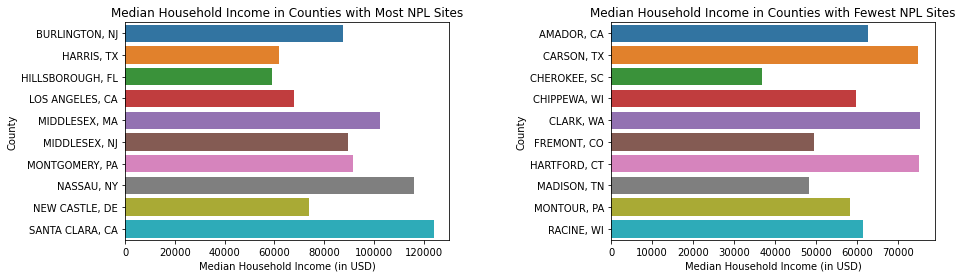

In [54]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.5, hspace=None)

ax1 = sns.barplot(x="median household income", y="county", data=mhi_top_df, ax=ax[0])

ax1.set_title('Median Household Income in Counties with Most NPL Sites')
ax1.set_xlabel('Median Household Income (in USD)')
ax1.set_ylabel('County')

ax2 = sns.barplot(x="median household income", y="county", data=mhi_bottom_df, ax=ax[1])

ax2.set_title('Median Household Income in Counties with Fewest NPL Sites')
ax2.set_xlabel('Median Household Income (in USD)')
ax2.set_ylabel('County')

The results are interesting - it seems as if the subset of counties with just 1 NPL site has higher median household income measures than the subset of counties with the most. This is revealing the limitation of the mhi_bottom_df subset in that there are many counties with just 1 NPL site, so the 10 in our sample might not be generalizable to the rest. As we move forward, we have several options: we can randomize the 10 counties in our sample (not just those at the bottom of the list), increase our sample size, or look at different ways of representing the data.

These bar plots also might hint that there could be a confounding variable here - if we look at the figure for counties with the most NPL sites, Santa Clara is a notable county in that it has a relatively high median household income of $120,000. Santa Clara is also in Silicon Valley, and upon further examination, most of these Superfund sites are located in past or current high-tech manufacturing sites (see https://qz.com/1017181/).

The Geospatial Analysis lecture from today (5/19) and continuing into Friday gave our group the idea to look into choropleth maps as an better method of data visualization, especially given the geographic nature of our data. For median household income in particular, it could be more insightful to plot one choropleth map of NPL sites by county amd another map of median household income by county, and compare the two maps. We will look into this once we learn more about geospatial analysis from lecture and other assignments!

### Duration of NPL Sites

In the same manner as how we analyzed the two subsets of the median household income, we will follow similar procedures to evaluate the significance of Superfund designation and coinciding factors. 

In [55]:
site_duration = county_df[['site name','county','duration','npl status date']]
site_duration.rename({'npl status date': 'year'}, axis=1, inplace=True)
site_duration['year'] = site_duration['year'].str[-4:]
site_duration = site_duration.astype({"year": int})
site_duration

,site name,county,duration,year
934,EVR-WOOD TREATING/EVANGELINE REFINING COMPANY,"ACADIA, LA",9,2012
1094,BRODERICK WOOD PRODUCTS,"ADAMS, CO",37,1984
...,...,...,...,...
461,LANGLEY AIR FORCE BASE/NASA LANGLEY RESEARCH C...,"YORK, VA",27,1994
1152,YUMA MARINE CORPS AIR STATION,"YUMA, AZ",31,1990


In [56]:
site_duration_top_df = site_duration[site_duration['county'].isin(top_10)]
site_duration_bottom_df = site_duration[site_duration['county'].isin(bottom_10)]

Text(0, 0.5, 'County')

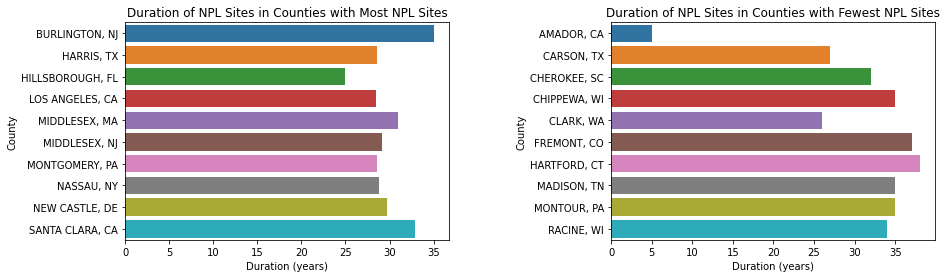

In [57]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.5, hspace=None)

ax1 = sns.barplot(x="duration", y="county", data=site_duration_top_df, ax=ax[0], ci=None)
ax1.set_title('Duration of NPL Sites in Counties with Most NPL Sites')
ax1.set_xlabel('Duration (years)')
ax1.set_ylabel('County')

ax2 = sns.barplot(x="duration", y="county", data=site_duration_bottom_df, ax=ax[1], ci=None)
ax2.set_title('Duration of NPL Sites in Counties with Fewest NPL Sites')
ax2.set_xlabel('Duration (years)')
ax2.set_ylabel('County')

In [58]:
pd.merge(site_duration_top_df.describe(), site_duration_bottom_df.describe(), 
         left_index=True, right_index=True, suffixes=('', '2'))

,duration,year,duration2,year2
count,144.000000,144.000000,10.0,10.00
mean,29.777778,1991.222222,30.4,1990.60
...,...,...,...,...
75%,37.000000,1996.000000,35.0,1992.75
max,38.000000,2018.000000,38.0,2016.00


As seen in the models above, the results show that on average, the designation of NPL sites in counties with the most NPL sites tends to be longer compared to NPL sites in counties with the fewest NPL sites. However, again, since the bottom 10 counties might not be generalizable to the rest, this may be giving us misrepresented results. 

The results further insinuate that regions with high NPL sites with long-duration lengths may be affecting the surrounding regions' median household income. The top 10 NPL Sites have progressing remediation processes continuing just over 25 years. As we advance our research, we can expectantly seek to find other factors that may be involved. 

### Population

Let's create a subset using just the relevant variables, including county, site name, and Total Population. We'll also drop any rows in the subset with missing data for Total Population.

In [59]:
pop_df = county_df[['site name', 'county', 'Total Population', 'Population Density (Per Sq. Mile)']]
pop_df = pop_df.dropna(subset=['Total Population'])
pop_df[['Total Population', 'Population Density (Per Sq. Mile)']] = pop_df[['Total Population', 'Population Density (Per Sq. Mile)']].astype(float)
pop_df

,site name,county,Total Population,Population Density (Per Sq. Mile)
1094,BRODERICK WOOD PRODUCTS,"ADAMS, CO",504108.0,432.2265
1107,ROCKY MOUNTAIN ARSENAL (USARMY),"ADAMS, CO",504108.0,432.2265
...,...,...,...,...
461,LANGLEY AIR FORCE BASE/NASA LANGLEY RESEARCH C...,"YORK, VA",67982.0,649.8693
1152,YUMA MARINE CORPS AIR STATION,"YUMA, AZ",209468.0,37.9895


We'll create two more subsets and compare their distributions:
1. 10 counties with the most NPL sites
2. 10 counties with the least NPL sites

We can start by getting a list of counties in order of their frequency in the dataset; we'll use the .value_counts() and .index.tolist() methods. These dataframes will be different from the other top 10 and bottom 10 dataframes because it will be extracted from the population dataframe. 

In [60]:
pop_counties = pop_df['county'].value_counts().index.tolist()

In [61]:
pop_top_10 = pop_counties[0:10]
pop_top_df = pop_df[pop_df['county'].isin(pop_top_10)]
pop_top_df

,site name,county,Total Population,Population Density (Per Sq. Mile)
153,LANG PROPERTY,"BURLINGTON, NJ",445702.0,557.6207
152,LANDFILL & DEVELOPMENT CO.,"BURLINGTON, NJ",445702.0,557.6207
...,...,...,...,...
1178,FAIRCHILD SEMICONDUCTOR CORP. (MOUNTAIN VIEW P...,"SANTA CLARA, CA",1927470.0,1492.9090
1241,TELEDYNE SEMICONDUCTOR,"SANTA CLARA, CA",1927470.0,1492.9090


In [62]:
pop_bottom_10 = pop_counties[615-10:]
pop_bottom_df = pop_df[pop_df['county'].isin(pop_bottom_10)]
pop_bottom_df

,site name,county,Total Population,Population Density (Per Sq. Mile)
979,GULFCO MARINE MAINTENANCE,"BRAZORIA, TX",360677.0,264.56740
377,DRAKE CHEMICAL,"CLINTON, PA",38915.0,43.82398
...,...,...,...,...
446,"ARROWHEAD ASSOCIATES, INC./SCOVILL CORP.","WESTMORELAND, VA",17751.0,77.40520
483,VIENNA TETRACHLOROETHENE,"WOOD, WV",84960.0,231.80940


[(0.0, 10500000.0)]

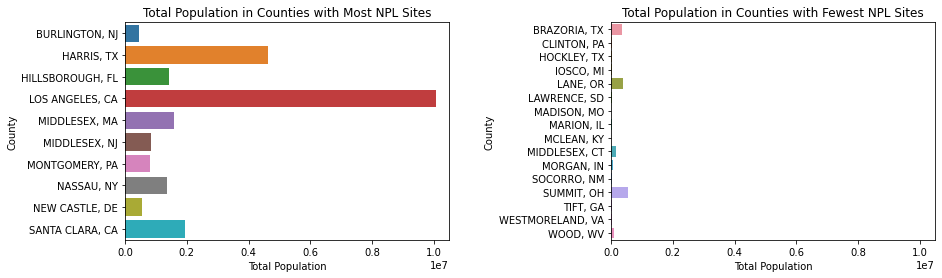

In [63]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.5, hspace=None)

pop_top_plot = sns.barplot(x="Total Population", y="county", data=pop_top_df, ax=ax[0])

pop_top_plot.set_title('Total Population in Counties with Most NPL Sites')
pop_top_plot.set_xlabel('Total Population')
pop_top_plot.set_ylabel('County')
pop_top_plot.set(xlim=(0, 10500000))

pop_bottom_plot = sns.barplot(x="Total Population", y="county", data=pop_bottom_df, ax=ax[1])

pop_bottom_plot.set_title('Total Population in Counties with Fewest NPL Sites')
pop_bottom_plot.set_xlabel('Total Population')
pop_bottom_plot.set_ylabel('County')
pop_bottom_plot.set(xlim=(0, 10500000))

[(0.0, 5000.0)]

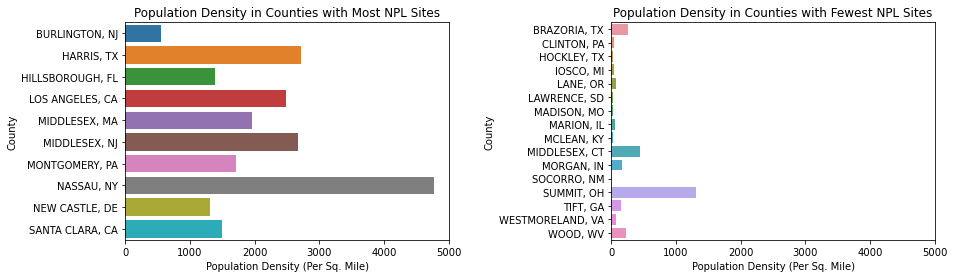

In [64]:

fig, ax =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.5, hspace=None)

pop_density_top_plot = sns.barplot(x="Population Density (Per Sq. Mile)", y="county", data=pop_top_df, ax=ax[0])

pop_density_top_plot.set_title('Population Density in Counties with Most NPL Sites')
pop_density_top_plot.set_xlabel('Population Density (Per Sq. Mile)')
pop_density_top_plot.set_ylabel('County')


pop_density_bottom_plot = sns.barplot(x="Population Density (Per Sq. Mile)", y="county", data=pop_bottom_df, ax=ax[1])

pop_density_bottom_plot.set_title('Population Density in Counties with Fewest NPL Sites')
pop_density_bottom_plot.set_xlabel('Population Density (Per Sq. Mile)')
pop_density_bottom_plot.set_ylabel('County')
pop_density_bottom_plot.set(xlim=(0, 5000))

From the plots above have the same axis limits in order to see the difference in scale for population. We can see that the counties with the most NPL sites tend to have more people living in them and higher population densities than the counties with the fewest NPL sites. 

Now, we'll look into the population percentage by race. Let's create dataframes for this and drop the NaN values. 

In [65]:
popper_df = county_df[['site name', 'county', '% Total Population: White Alone', 
           '% Total Population: Black or African American Alone', 
           '% Total Population: American Indian and Alaska Native Alone',
           '% Total Population: Asian Alone', 
           '% Total Population: Native Hawaiian and Other Pacific Islander Alone', 
           '% Total Population: Some Other Race Alone', 
           '% Total Population: Two or More Races']]

popper_df = popper_df.dropna()

col = ['% Total Population: White Alone', 
           '% Total Population: Black or African American Alone', 
           '% Total Population: American Indian and Alaska Native Alone',
           '% Total Population: Asian Alone', 
           '% Total Population: Native Hawaiian and Other Pacific Islander Alone', 
           '% Total Population: Some Other Race Alone', 
           '% Total Population: Two or More Races']

popper_df[col] = popper_df[col].apply(pd.to_numeric)

popper_df

,site name,county,% Total Population: White Alone,% Total Population: Black or African American Alone,...,% Total Population: Asian Alone,% Total Population: Native Hawaiian and Other Pacific Islander Alone,% Total Population: Some Other Race Alone,% Total Population: Two or More Races
1094,BRODERICK WOOD PRODUCTS,"ADAMS, CO",81.56,3.38,...,3.95,0.12,5.56,4.34
1107,ROCKY MOUNTAIN ARSENAL (USARMY),"ADAMS, CO",81.56,3.38,...,3.95,0.12,5.56,4.34
...,...,...,...,...,...,...,...,...,...
461,LANGLEY AIR FORCE BASE/NASA LANGLEY RESEARCH C...,"YORK, VA",74.44,13.29,...,5.64,0.33,1.43,4.61
1152,YUMA MARINE CORPS AIR STATION,"YUMA, AZ",76.32,2.16,...,1.33,0.08,15.84,2.72


We will want to eventually have a subplot of White, Black, Asian, and Other Race. So let's add together American Indian and Alaska Native alone, Native Hawaiian and Other Pacific Islander Alone, Some Other Race Alone, and Two or More Races. Then we'll add this into a new column in our population percentage dataframe. 

In [66]:
other_race = popper_df['% Total Population: Asian Alone']+popper_df['% Total Population: American Indian and Alaska Native Alone'] + popper_df['% Total Population: Native Hawaiian and Other Pacific Islander Alone'] + popper_df['% Total Population: Some Other Race Alone'] + popper_df['% Total Population: Two or More Races']
popper_df["% Total Population: Native American + Other Races"] = other_race

popper_df

,site name,county,% Total Population: White Alone,% Total Population: Black or African American Alone,...,% Total Population: Native Hawaiian and Other Pacific Islander Alone,% Total Population: Some Other Race Alone,% Total Population: Two or More Races,% Total Population: Native American + Other Races
1094,BRODERICK WOOD PRODUCTS,"ADAMS, CO",81.56,3.38,...,0.12,5.56,4.34,15.07
1107,ROCKY MOUNTAIN ARSENAL (USARMY),"ADAMS, CO",81.56,3.38,...,0.12,5.56,4.34,15.07
...,...,...,...,...,...,...,...,...,...
461,LANGLEY AIR FORCE BASE/NASA LANGLEY RESEARCH C...,"YORK, VA",74.44,13.29,...,0.33,1.43,4.61,12.27
1152,YUMA MARINE CORPS AIR STATION,"YUMA, AZ",76.32,2.16,...,0.08,15.84,2.72,21.51


Now, we'll get the population percentages in counties with the most NPL sites and the least NPL sites. 

In [67]:
popper_counties = popper_df['county'].value_counts().index.tolist()

In [68]:
popper_top_10 = popper_counties[0:10]
popper_top_df = popper_df[popper_df['county'].isin(popper_top_10)]
popper_top_df

,site name,county,% Total Population: White Alone,% Total Population: Black or African American Alone,...,% Total Population: Native Hawaiian and Other Pacific Islander Alone,% Total Population: Some Other Race Alone,% Total Population: Two or More Races,% Total Population: Native American + Other Races
153,LANG PROPERTY,"BURLINGTON, NJ",72.02,16.89,...,0.06,1.98,3.85,11.10
152,LANDFILL & DEVELOPMENT CO.,"BURLINGTON, NJ",72.02,16.89,...,0.06,1.98,3.85,11.10
...,...,...,...,...,...,...,...,...,...
1178,FAIRCHILD SEMICONDUCTOR CORP. (MOUNTAIN VIEW P...,"SANTA CLARA, CA",44.47,2.49,...,0.38,10.50,5.20,53.05
1241,TELEDYNE SEMICONDUCTOR,"SANTA CLARA, CA",44.47,2.49,...,0.38,10.50,5.20,53.05


In [69]:
popper_bottom_10 = popper_counties[615-10:]
popper_bottom_df = popper_df[popper_df['county'].isin(popper_bottom_10)]
popper_bottom_df

,site name,county,% Total Population: White Alone,% Total Population: Black or African American Alone,...,% Total Population: Native Hawaiian and Other Pacific Islander Alone,% Total Population: Some Other Race Alone,% Total Population: Two or More Races,% Total Population: Native American + Other Races
979,GULFCO MARINE MAINTENANCE,"BRAZORIA, TX",72.41,13.98,...,0.01,4.03,2.22,13.61
377,DRAKE CHEMICAL,"CLINTON, PA",96.23,1.79,...,0.03,0.21,0.65,1.98
...,...,...,...,...,...,...,...,...,...
446,"ARROWHEAD ASSOCIATES, INC./SCOVILL CORP.","WESTMORELAND, VA",67.91,25.90,...,0.01,2.47,2.47,6.19
483,VIENNA TETRACHLOROETHENE,"WOOD, WV",96.19,1.42,...,0.06,0.11,1.25,2.38


[(0.0, 100.0)]

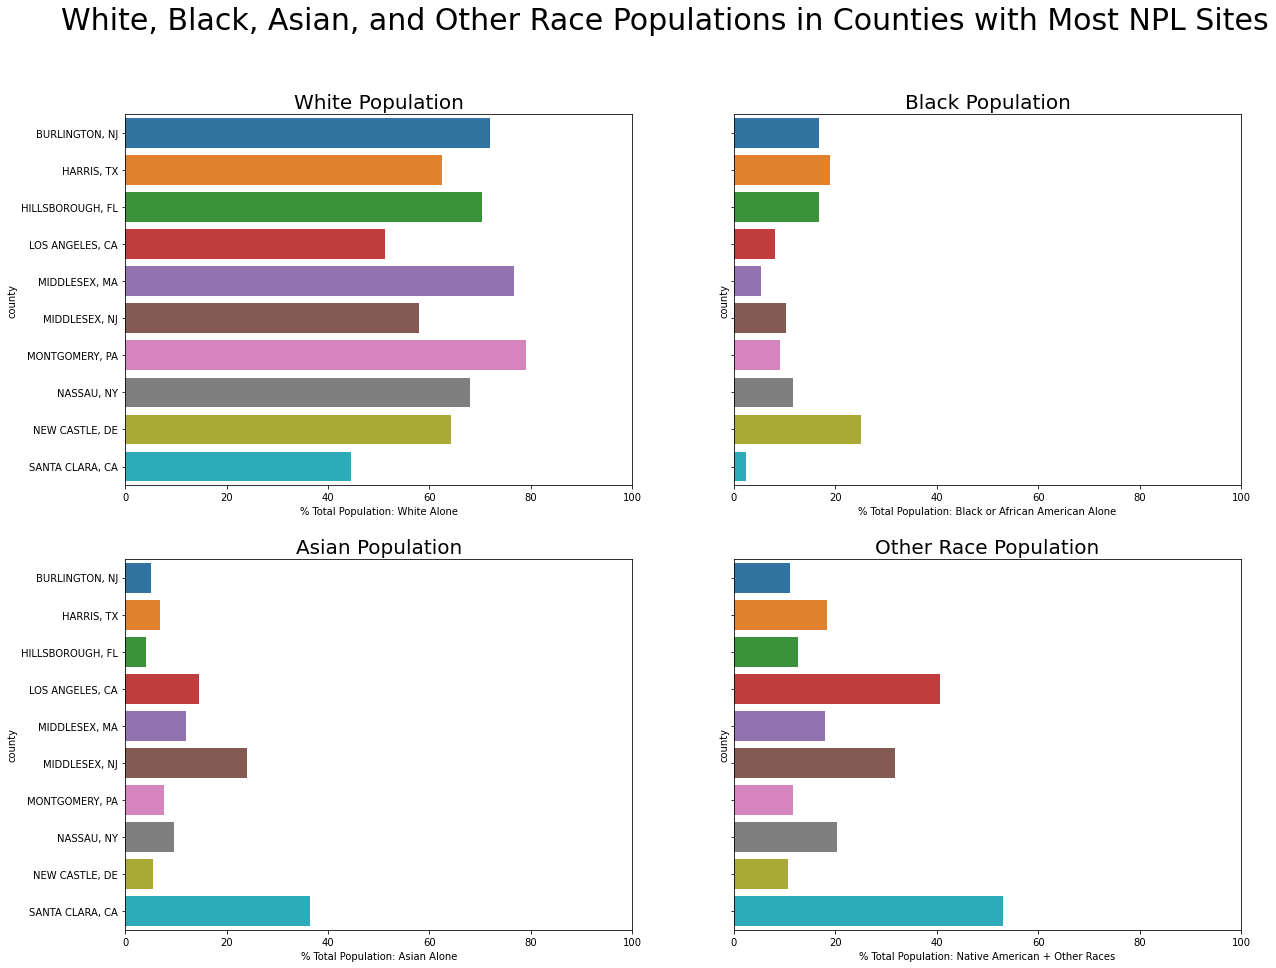

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharey=True)
fig.suptitle('White, Black, Asian, and Other Race Populations in Counties with Most NPL Sites', fontsize=30)


white = sns.barplot(ax=axes[0,0], x='% Total Population: White Alone', y='county',data=popper_top_df)
axes[0,0].set_title('White Population',fontsize=20)
white.set(xlim=(0, 100))

black = sns.barplot(ax=axes[0,1], x='% Total Population: Black or African American Alone', y='county', data=popper_top_df)
axes[0,1].set_title('Black Population',fontsize=20)
black.set(xlim=(0, 100))

asian = sns.barplot(ax=axes[1,0], x='% Total Population: Asian Alone', y='county', data=popper_top_df)
axes[1,0].set_title('Asian Population',fontsize=20)
asian.set(xlim=(0, 100))


other = sns.barplot(ax=axes[1,1], x='% Total Population: Native American + Other Races', y='county', data=popper_top_df)
axes[1,1].set_title('Other Race Population',fontsize=20)
other.set(xlim=(0,100))

[(0.0, 100.0)]

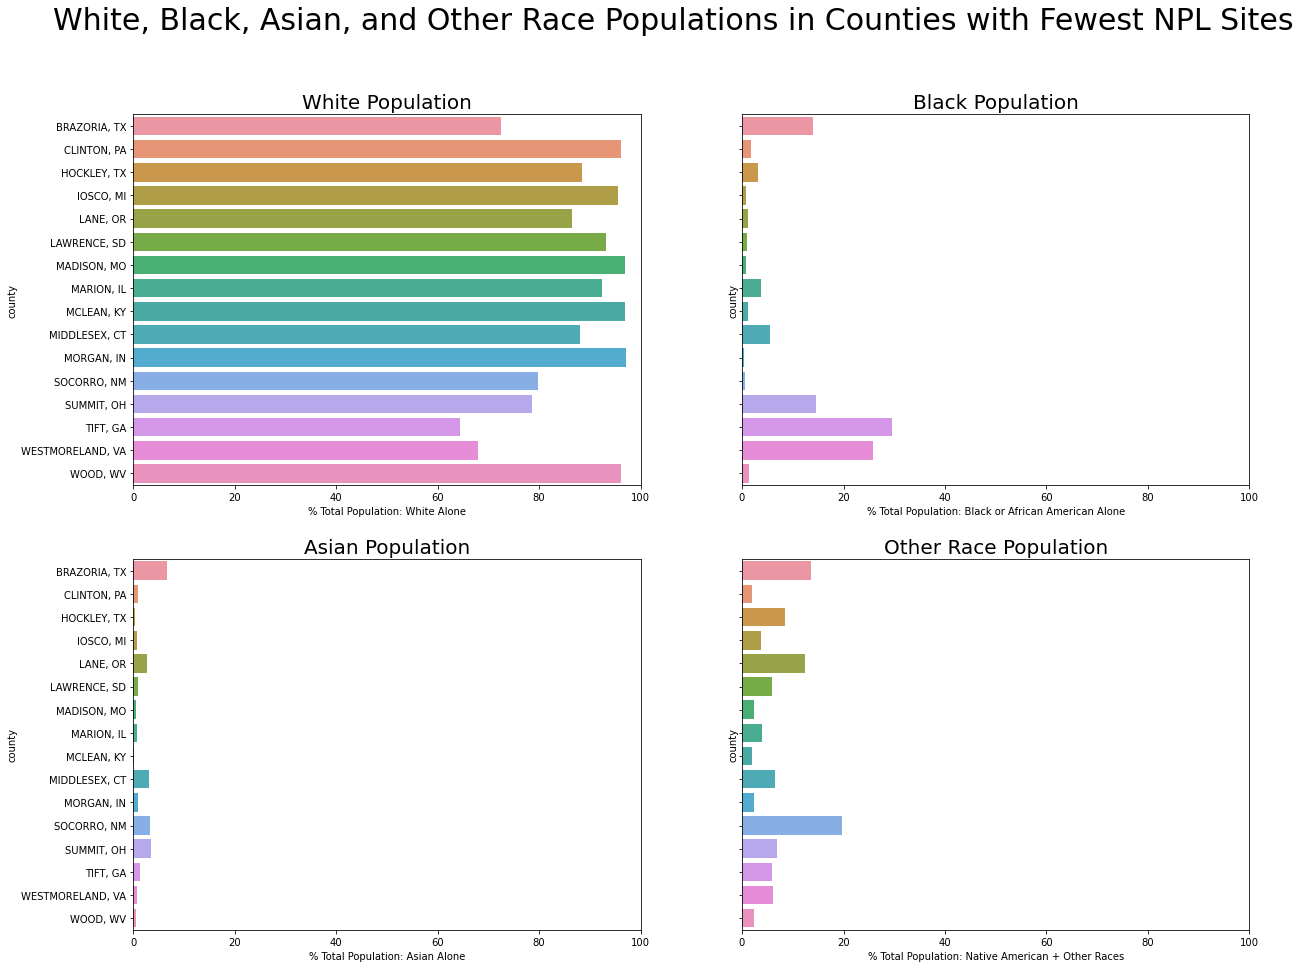

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharey=True)
fig.suptitle('White, Black, Asian, and Other Race Populations in Counties with Fewest NPL Sites', fontsize=30)

white = sns.barplot(ax=axes[0,0], x='% Total Population: White Alone', y='county',data=popper_bottom_df)
axes[0,0].set_title('White Population',fontsize=20)
white.set(xlim=(0, 100))

black = sns.barplot(ax=axes[0,1], x='% Total Population: Black or African American Alone', y='county', data=popper_bottom_df)
axes[0,1].set_title('Black Population',fontsize=20)
black.set(xlim=(0, 100))

asian = sns.barplot(ax=axes[1,0], x='% Total Population: Asian Alone', y='county', data=popper_bottom_df)
axes[1,0].set_title('Asian Population',fontsize=20)
asian.set(xlim=(0, 100))


other = sns.barplot(ax=axes[1,1], x='% Total Population: Native American + Other Races', y='county', data=popper_bottom_df)
axes[1,1].set_title('Other Race Population',fontsize=20)
other.set(xlim=(0,100))

From the graphs above, we can see that there is a large white population in both counties with the most NPL sites and counties with the least NPL sites. However, there is a larger Black, Asian, and other race population in the counties with the most NPL sites than in the counties with the least NPL sites. 

### Per Capita Income and Poverty Percentages by Age

Next, we want to look at each county's Per Capita Income and Poverty Percentages by Age Bracket through these variables:

`site name`, `county`, `duration`, `Per Capita Income (In 2019 Inflation Adjusted Dollars)`* , `% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty`, `% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty`, `% Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty`

\*According to [census.gov](https://www.census.gov/quickfacts/fact/note/US/INC910219), Per Capita Income is determined using the mean: "Per capita income is the mean income computed for every man, woman, and child in a particular group including those living in group quarters. It is derived by dividing the aggregate income of a particular group by the total population in that group. This measure is rounded to the nearest whole dollar."

We'll assign this subset of `county_df` to a new dataframe `age_df` to make it easier to work with:

In [72]:
age_df = county_df[['site name',
                    'county', 'state', 
                    'Per Capita Income (In 2019 Inflation Adjusted Dollars)', 
                    '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty', 
                    '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty', 
                    '% Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty']]
age_df['duration'] = site_duration['duration']
age_df.columns = ['site name', 'county', 'state', 'per_cap_income', 'pov_perc_under18', 'pov_perc_18to64', 'pov_perc_65up', 'duration']
#age_df

KeyError: "['% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty', 'Per Capita Income (In 2019 Inflation Adjusted Dollars)', '% Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty', '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty'] not in index"

We'll then convert the numerical columns into floats to do calculations/manipulations on:

In [ ]:
age_df[['per_cap_income', 'pov_perc_under18', 'pov_perc_18to64', 'pov_perc_65up', 'duration']] = age_df[['per_cap_income', 'pov_perc_under18', 'pov_perc_18to64', 'pov_perc_65up', 'duration']].astype(float)

age_df

In [ ]:
print("Total NaN values in age_df: ",
       age_df.isnull().sum().sum())
print("Total NaN values in age_df per column:\n",
      age_df.isnull().sum())

In [ ]:
#pd.options.display.max_rows = 48
null_data = age_df[age_df.isnull().any(axis=1)]
null_data

It appears that a good portion of the NaN values exist due to NPL sites located in U.S. territories, for which we do not have ACS data for. We can drop those rows from the dataframe: 

In [ ]:
age_df.drop(index=age_df[age_df['county'].str.contains('PR|GUAM')].index, inplace=True)
county_df.drop(index=county_df[county_df['county'].str.contains('PR|GUAM')].index, inplace=True)
null_data = age_df[age_df.isnull().any(axis=1)]
null_data

It seems the remaining 29 observations do not have corresponding data from the ACS dataset.

Let's take a look at the dataframe's descriptive data:

In [ ]:
pd.options.display.max_rows = 10
age_df.describe().round(2)

Looking at the information above, the data fall in line with what we expected to find re: aggregate census income data of the US population. But we can get a better picture by charting it:

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

ax1=sns.histplot(data=age_df, x="per_cap_income", kde=True, color="blue", ax=axs[0, 0], bins=100)
ax1.axvline(age_df['per_cap_income'].mean(), color='darkred', linestyle='--', label='mean');
ax1.axvline(age_df['per_cap_income'].median(), color = '#2e2e2e', linestyle='--', label='median')
ax1.legend()

ax2=sns.histplot(data=age_df, x="pov_perc_under18", kde=True, color="green", ax=axs[0, 1], bins=70)
ax2.axvline(age_df['pov_perc_under18'].mean(), color='darkred', linestyle='--', label='mean');
ax2.axvline(age_df['pov_perc_under18'].median(), color = '#2e2e2e', linestyle='--', label='median')
ax2.legend()

ax3=sns.histplot(data=age_df, x="pov_perc_18to64", kde=True, color="red", ax=axs[1, 0], bins=60)
ax3.axvline(age_df['pov_perc_18to64'].mean(), color='darkred', linestyle='--', label='mean');
ax3.axvline(age_df['pov_perc_18to64'].median(), color = '#2e2e2e', linestyle='--', label='median')
ax3.legend()

ax4=sns.histplot(data=age_df, x="pov_perc_65up", kde=True, color="purple", ax=axs[1, 1], bins=30)
ax4.axvline(age_df['pov_perc_65up'].mean(), color='darkred', linestyle='--', label='mean');
ax4.axvline(age_df['pov_perc_65up'].median(), color = '#2e2e2e', linestyle='--', label='median')
ax4.legend()

plt.show()

All four of these plot distributions appear right-skewed, driving the respective means slightly higher than the medians, especially for Per Capita Income. Let's take a look at the observations corresponding to the maximum and minimum `per_cap_income` values:

In [ ]:
print('Observation w/ max per capita income: \n\n', age_df[age_df.per_cap_income == age_df.per_cap_income.max()], '\n\n')
print('Observation w/ min per capita income: \n\n', age_df[age_df.per_cap_income == age_df.per_cap_income.min()])

Looking up demographic income information about San Francisco County, CA (the county with highest average per capita income) and McKinley County, NM (the lowest average per capita income), the large disparity checks out: San Francisco County has one of the nation's highest per capita income levels, while McKinley County, one of the lowest. 

While the range is large, they are not degrees apart from each other, so we will not be performing a log transformation on the data. 

Now let's figure out the frequency of NPL sites in each county. As each observation corresponds to a different NPL site accompanied by the county it resides in, we'll do this by adding up the number of times a county occurs in the dataframe:

In [ ]:
age_df.value_counts(['county'])

In [ ]:
age_df.value_counts(['county']).describe()

Looking at the descriptive info above, the vast amount of observations have 1-2 NPL sites on the county level.

We'll add a column for `npl_count` that lists the NPL total for the observation's respective county:

In [ ]:
pd.options.display.max_rows = 5
age_df['npl_count'] = age_df['county'].map(age_df['county'].value_counts())
age_df

Now that we've tabulated the `npl_count` of each respective `county`, we can chart per capita income and poverty rate information against it, starting with county level:

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
ax1=sns.lineplot(data=age_df, x="npl_count", y="per_cap_income", color="blue", estimator=np.median, ax=axs[0, 0])
ax2=sns.lineplot(data=age_df, x="npl_count", y="pov_perc_under18", color="green", estimator=np.median, ax=axs[0, 1])
ax3=sns.lineplot(data=age_df, x="npl_count", y="pov_perc_18to64", color="red", estimator=np.median, ax=axs[1, 0])
ax4=sns.lineplot(data=age_df, x="npl_count", y="pov_perc_65up", color="purple", estimator=np.median, ax=axs[1, 1])
plt.show()

The data seem fairly consistent between age brackets. It appears that the findings for these variables go in a different direction from hypothesis: counties with high NPL sites have higher incomes and lower poverty percentages. This finding checks out as the top two counties for NPL count (Santa Clara CA, Montgomery PA) have some of the higest income levels in the nation.

However, this finding may be constrained by the large staggering in data, the large range in npl_count values between ~13-21, and the fact that the majority of counties have 1-2 NPL sites.

Let's look at the comparison at a less granular state level:

In [ ]:
age_df['npl_count_state'] = age_df['state'].map(age_df['state'].value_counts())

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
ax1=sns.lineplot(data=age_df, x="npl_count_state", y="per_cap_income", color="blue", estimator=np.median, ax=axs[0, 0])
ax2=sns.lineplot(data=age_df, x="npl_count_state", y="pov_perc_under18", color="green", estimator=np.median, ax=axs[0, 1])
ax3=sns.lineplot(data=age_df, x="npl_count_state", y="pov_perc_18to64", color="red",estimator=np.median, ax=axs[1, 0])
ax4=sns.lineplot(data=age_df, x="npl_count_state", y="pov_perc_65up", color="purple", estimator=np.median, ax=axs[1, 1])
plt.show()

The results of the state-level comparison shares some similar overall patterns as the county-level comparison, but even more staggered in the first half where most of the observations lie. As the NPL count increases, so does the range, which then tapers off toward the last quintile. 

To observe relationships between NPL sites and income and poverty, we can also take a look at how long it takes for an NPL site to be remedied, i.e. `duration`. We'll chart duration against income and poverty information: 

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
ax1=sns.lineplot(data=age_df, x="duration", y="per_cap_income", color="blue", estimator=np.median, ax=axs[0, 0])
ax2=sns.lineplot(data=age_df, x="duration", y="pov_perc_under18", color="green", estimator=np.median, ax=axs[0, 1])
ax3=sns.lineplot(data=age_df, x="duration", y="pov_perc_18to64", color="red", estimator=np.median, ax=axs[1, 0])
ax4=sns.lineplot(data=age_df, x="duration", y="pov_perc_65up", color="purple", estimator=np.median, ax=axs[1, 1])
plt.show()

From the relative lack of gradient from the above charts, there's not much of a case for the relationship between aforementioned income variables and the duration of an NPL site being under NPL status. 
However, we can also use a scatter matrix to see if there are any viable relationships within the dataframe:

In [ ]:
pd.plotting.scatter_matrix(age_df,
                           figsize  = [15, 15]);

The scatter matrix does not convey strong relationships between the npl variables (`npl_count`, `duration`) and the economic data. 

Looking at these economic (`per_cap_income`, `pov_perc_under18`, `pov_perc_18to64`, `pov_perc_65up`) and npl variables (`npl_count`, `duration`), it appears that these data do not necessarily support our initial hypothesis that there was a higher frequency and duration of NPL sites in areas with higher poverty, or that there may much of any relationship at all. Moreover, our findings for these variables may be constrained by the fact that the majority of observations have 1-2 NPL sites. 

### Income Below Poverty Level

For this section, we'll grab all the columns for site name, county, duration,| total population and all columns where "Income Below Poverty Level" is included (columns 30-38). We'll also rename the columns and delete rows that have missing data in the income below poverty level column.

In [ ]:
below_pov_df = county_df[['site name',
                          'county',
                          'Total Population',
                          'duration',
                          '% White Alone Population for Whom Poverty Status Is  Determined: Income Below Poverty Level',
                          '% Black or African American Alone Population for  Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level',
                          '% American Indian and Alaska Native Alone  Population For&nbsp; Whom Poverty Status Is Determined: Income Below Poverty Level',
                          '% Asian Alone Population for Whom Poverty Status Is  Determined: Income Below Poverty Level',
                          '% Native Hawaiian and Other Pacific Islander Alone &nbsp; Population for Whom Poverty Status Is Determined: Income Below Poverty Level',
                          '% Some Other Race Alone Population for Whom Poverty  Status Is Determined: Income Below Poverty Level',
                          '% Two or More Races Population for Whom Poverty  Status Is Determined: Income Below Poverty Level',
                          '% Hispanic or Latino Population for Whom Poverty  Status Is Determined: Income Below Poverty Level',
                          '% White Alone, Not Hispanic or Latino Population  for Whom&nbsp; Poverty Status Is Determined: Income Below Poverty Level']]

below_pov_df.columns = ['site name',
                       'county',
                       'total population',
                        'duration',
                       'perc_white_income_below_pov',
                       'perc_black_income_below_pov',
                       'perc_indigenous_income_below_pov',
                       'perc_asian_income_below_pov',
                       'perc_islander_income_below_pov',
                       'perc_other_income_below_pov',
                       'perc_two_income_below_pov',
                       'perc_hispanic_income_below_pov',
                       'perc_whitenonhisp_income_below_pov']
below_pov_df

Similar to the sections above, since we have thousands of rows of data which would be difficult to visualize, we'll compare two subsets made from this dataframe with the poverty levels of each race.
1. Counties with the most NPL sites
2. Counties with the least NPL sites

First, we're going to clean up our data a little more by combining some of the columns together, specifically the columns of two or more races, other, and white non-Hispanic.

In [ ]:
print(below_pov_df.columns)

To add columns together, we'll have to convert the percentages in the columns into floats. Right now, they're object types.

In [ ]:
below_pov_df.dtypes

In [ ]:
below_pov_df['perc_white_income_below_pov'] = below_pov_df['perc_white_income_below_pov'].astype(float)
below_pov_df['perc_black_income_below_pov'] = below_pov_df['perc_black_income_below_pov'].astype(float)
below_pov_df['perc_indigenous_income_below_pov'] = below_pov_df['perc_indigenous_income_below_pov'].astype(float)
below_pov_df['perc_asian_income_below_pov'] = below_pov_df['perc_asian_income_below_pov'].astype(float)
below_pov_df['perc_islander_income_below_pov'] = below_pov_df['perc_islander_income_below_pov'].astype(float)
below_pov_df['perc_other_income_below_pov'] = below_pov_df['perc_other_income_below_pov'].astype(float)
below_pov_df['perc_two_income_below_pov'] = below_pov_df['perc_two_income_below_pov'].astype(float)
below_pov_df['perc_hispanic_income_below_pov'] = below_pov_df['perc_hispanic_income_below_pov'].astype(float)
below_pov_df['perc_whitenonhisp_income_below_pov'] = below_pov_df['perc_whitenonhisp_income_below_pov'].astype(float)

below_pov_df.dtypes

We'll add the three columns mentioned above together and add it into our subset.

In [ ]:
other_below = below_pov_df['perc_other_income_below_pov'] + below_pov_df['perc_two_income_below_pov'] + below_pov_df['perc_whitenonhisp_income_below_pov']
below_pov_df['perc_other_races_income_below_pov'] = other_below

below_pov_df

And we'll drop the ones we combined from our subset.

In [ ]:
below_pov_df = below_pov_df.drop(['perc_other_income_below_pov', 'perc_two_income_below_pov', 'perc_whitenonhisp_income_below_pov'], axis=1)
below_pov_df

We'll go ahead and check the rows for any missing values in the income below poverty level columns. We will delete rows that have missing values as those values are essential.

In [ ]:
povnan = below_pov_df[below_pov_df.isnull().any(axis=1)]
povnan

In [ ]:
below_pov_df.isna().sum().sum()

There are a total of 374 missing values spread out in 153 rows of the dataset. We'll delete these rows, and reset the index.

In [ ]:
below_pov_df = below_pov_df.dropna()
below_pov_df.reset_index(drop=True, inplace=True)
below_pov_df

Let's check again to make sure we have no missing data.

In [ ]:
below_pov_df.isna().sum().sum()

To find the top 10 and bottom 10 NPL sites in our subset, we'll use value_counts() and index.tolist() to sort.

In [ ]:
below_pov_df.value_counts(['county'])

In [ ]:
below_df = below_pov_df['county'].value_counts().index.tolist()

We'll slice for the first 10 and last 10 rows.

In [ ]:
below_top_10 = below_df[0:10]
below_bottom_10 = below_df[515-10:]

In [ ]:
below_top_10

In [ ]:
below_bottom_10

Below is the subset of the top 10 counties with the most NPL sites.

In [ ]:
below_pov_top_df = below_pov_df[below_pov_df['county'].isin(below_top_10)]
below_pov_top_df

And below is the subset of the top 10 counties with the least NPL sites.

In [ ]:
below_pov_bottom_df = below_pov_df[below_pov_df['county'].isin(below_bottom_10)]
below_pov_bottom_df

With this data, we can start forming our plots. We'll keep the x-axis the same across our plots to compare the graphs together equally.

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(4, 2, figsize=(20, 25), sharey=True)
fig.suptitle('% of Each Race w/ Income Below Poverty Level in Counties with Most NPL Sites', fontsize=25)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

ax_white = sns.barplot(ax=ax[0,0], x='perc_white_income_below_pov', y='county', data=below_pov_top_df)
ax_white.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[0,0].set_title('White Percentage',fontsize=20)

ax_black = sns.barplot(ax=ax[0,1], x='perc_black_income_below_pov', y='county', data=below_pov_top_df)
ax_black.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[0,1].set_title('Black Percentage',fontsize=20)

ax_indigenous = sns.barplot(ax=ax[1,0], x='perc_indigenous_income_below_pov', y='county', data=below_pov_top_df)
ax_indigenous.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[1,0].set_title('Indigenous Percentage',fontsize=20)

ax_asian = sns.barplot(ax=ax[1,1], x='perc_asian_income_below_pov', y='county', data=below_pov_top_df)
ax_asian.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[1,1].set_title('Asian Percentage',fontsize=20)

ax_islander = sns.barplot(ax=ax[2,0], x='perc_islander_income_below_pov', y='county', data=below_pov_top_df)
ax_islander.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[2,0].set_title('Islander Percentage',fontsize=20)

ax_hispanic = sns.barplot(ax=ax[2,1], x='perc_hispanic_income_below_pov', y='county', data=below_pov_top_df)
ax_hispanic.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[2,1].set_title('Hispanic Percentage',fontsize=20)

ax_other = sns.barplot(ax=ax[3,0], x='perc_other_races_income_below_pov', y='county', data=below_pov_top_df)
ax_other.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[3,0].set_title('Other Race Percentage',fontsize=20)

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(4, 2, figsize=(20, 25), sharey=True)
fig.suptitle('% of Each Race w/ Income Below Poverty Level in Counties with Least NPL Sites', fontsize=25)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

ax_white = sns.barplot(ax=ax[0,0], x='perc_white_income_below_pov', y='county', data=below_pov_bottom_df)
ax_white.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[0,0].set_title('White Percentage',fontsize=20)

ax_black = sns.barplot(ax=ax[0,1], x='perc_black_income_below_pov', y='county', data=below_pov_bottom_df)
ax_black.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[0,1].set_title('Black Percentage',fontsize=20)

ax_indigenous = sns.barplot(ax=ax[1,0], x='perc_indigenous_income_below_pov', y='county', data=below_pov_bottom_df)
ax_indigenous.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[1,0].set_title('Indigenous Percentage',fontsize=20)

ax_asian = sns.barplot(ax=ax[1,1], x='perc_asian_income_below_pov', y='county', data=below_pov_bottom_df)
ax_asian.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[1,1].set_title('Asian Percentage',fontsize=20)

ax_islander = sns.barplot(ax=ax[2,0], x='perc_islander_income_below_pov', y='county', data=below_pov_bottom_df)
ax_islander.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[2,0].set_title('Islander Percentage',fontsize=20)

ax_hispanic = sns.barplot(ax=ax[2,1], x='perc_hispanic_income_below_pov', y='county', data=below_pov_bottom_df)
ax_hispanic.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[2,1].set_title('Hispanic Percentage',fontsize=20)

ax_other = sns.barplot(ax=ax[3,0], x='perc_other_races_income_below_pov', y='county', data=below_pov_bottom_df)
ax_other.set(xlim=(0, 100), xlabel='Percentage', ylabel='County')
ax[3,0].set_title('Other Race Percentage',fontsize=20)


From the graphs above, we can see that there are the least percentage of the White population who are living below poverty levels for both counties with the most NPL site and with the least NPL sites. With the other races, however, there seem to be a larger percentage of each race's population that live below the poverty level in counties that have the least NPL sites compared to the counties with the most NPL sites. 

We have to consider that there might be limits to our bottom data as there are many counties that have only 1 NPL site. For the Other Races plot, since we added 3 columns together, the percentage of poverty is much higher compared to the other races as well. 

# Ethics & Privacy

Our datasets will be from the EPA and the Census. The EPA provides the National Priorities List (NPL), which includes site name, site score, date added, and links to a site description and current status. The Census provides information on a city or county’s demographic, including ethnicity, household income, and life expectancy. All data from the EPA and the Census are public information and completely anonymous. 
	
One potential bias with the data we proposed is that we will not be able to find data for all 40,000 superfund sites. The EPA provides data for only superfund sites on the NPL. Bias can come from how the EPA chooses a superfund site to be put on the NPL. Only sites discovered by the EPA and have gone through EPA’s evaluations and have passed the qualifications are listed on the NPL. Sites that do not qualify are not included in the Superfund list even if these sites are polluted. Furthermore, our data does not account for sites not designated as a Superfund Site. Sites are discovered through requests from US EPA, as well as state agencies, health departments and private citizens. Sites can therefore be unrecognized by Superfund if it is not reported. Therefore, bias can also come from how the EPA designates a superfund site, which is one of the topics we are exploring in this report. 
	
Because the Census is self-reported, there can be large potential biases. Household income, ethnicity, or race can be manipulated by the submitter of the Census, therefore invalidating the submission. This can cause the data to be biased based on people’s answers. Additionally, many people may not participate in the Census. Therefore, there would be missing data for people who did not participate. 
	
Another bias comes from the dates of when the Superfund sites were cleaned. We are analyzing whether there is a relationship between a county’s socioeconomic or demographic status and the Superfund cleanup date. Because the EPA is the one providing all the data on the Superfund sites, it’s possible that they could provide more favorable cleanup dates, which would skew our results. 
	
Although there are potential biases in our datasets, the EPA and the Census are federal organizations that provide reliable sources of data. The Superfund sites undergo thorough testing and evaluations to determine it’s status, which means they are reliable in determining actual affected areas. 

# Conclusion & Discussion

Within our datasets for Superfund/National Priorities List (NPL) Sites and census data from the 2019 American Community Survey (ACS), we came across some limitations that will need to be considered while analyzing. Within our NPL dataset, the sites listed are of sites that are still currently active, and does not include sites that have been taken off the NPL. For the ACS dataset, there is a large disparity in the number of collected responses between races, especially within the Median Household Incomes. Another limitation of the ACS data is that this dataset only contains the mean values of demographic data within a 5 year period, from 2015 to 2019, and as a result, any outlying changes would not be evident.

# Team Contributions

*Specify who in your group worked on which parts of the project.*